## Content
* [Sequence Models](#1)
* [Recurrent Neural Network (RNN)](#2)
* [Implementing Recurrent Neural Network with Keras](#3)
    * [Loading and Preprocessing Data](#31)
    * [Create RNN Model](#32)
    * [Predictions and Visualising RNN Model](#33)
* [Long Short Term Memory (LSTMs)](#4)
* [Implementing Long Short Term Memory with Keras](#99)
    * [Loading and Visualizing Data](#41)
    * [Preprocessing Data](#42)
    * [Create LSTM Model](#43)
    * [Predictions and Visualising LSTM Model](#44)
* [Conclusion](#6)

<a id="1"></a>
## Sequence Models
* Sequence models plays an over time. 
* Speech recognition, natural language process (NLP), music generation
* Apples Siri and Google's voice search
* Sentiment classification (duygu sınıflandırma) Mesela "bu ders bu dunyadaki en guzel ders" yada "sacma sapan ders cekmissin hocaaa"  

<a id="2"></a>
## Recurrent Neural Network
* RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.
* This is the reason why they are the preferred algorithm for sequential data like time series, speech, text, financial data, audio, video, weather and much more because they can form a much deeper understanding of a sequence and its context, compared to other algorithms.
* Not only feeds output but also gives feed backs into itself. Because RNN has internal memory
* temporal loop = zamansal döngü. Kendini besler.
* ![title](temporal loop.jpg)
* Belleğe sahipler short term memory bir önceki node da olanları hatırlarlar. Eskiyi hatırlar.
* Mesela geçmişi hatırlamak neden önemli biz yaptıklarımızdan bir şeyler öğreniriz ve yeni öğrenilen şeyleri de eski öğrendiklerimizi üzerine kurarız. RNN'i de aynı mantıkta düşünebilirsiniz. Film örneğinde olduğu gibi.
* ![title](new world image.jpg)
* Örnek RNN yapılarına bakalım
* One to Many
    * Input bir resim output o resimde yapılan cümle yani "Adam surf yapıyor"
    * ![title](one to many.jpg)
* Many to One
    * Input bir cümle output bir duygu mesela iyimser neşeli gibi.
    * ![title](many to one.jpg)
* Many to Many
    * Mesela google translate kullanarak İngilizceden bir cümleyi Türkçe'ye translate etmek
    * ![title](many to many.jpg)
* RNN short term memory'e sahip ama LSTM long term memory'e de sahip olabiliyor.
* RNN'i ANN yada CNN'den ayıran daha önce de belirttiğimiz gibi *memory*. Mesela "DATAI" diye bir stringimiz var ve biz 4. harfe geldik yani "A" harfine. ANN' e sorduğumuz zaman 4. harfi A olan bir kelimenin 5. harfi ne olabilir diye. ANN bilemez çünkü memory olmadığı için geçmiş harfleri yani "DAT" harflerini bilip "A" ile birleştirip daha sonra 5. harf "I" olabilir diyemez. Ama RNN tam olarak bunu söyleyebilir.
* Exploiding Gradients: Gradient'in çok büyük olması durumu. Gereksiz yere belli weightlere önem kazandırır.
* Vanishing Gradients: Gradient'in çok küçük olması durumu. Yavaş öğrenir.
* Gradient neydi arkadaşlar costa göre weightlerde ki değişim.

<a id="3"></a>
## Implementing Recurrent Neural Network with Keras
* [Loading and Preprocessing Data](#31)
* [Create RNN Model](#32)
* [Predictions and Visualising RNN Model](#33)

<a id="31"></a>
### Loading and Preprocessing Data

In [2]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the training dataset
dataset_train = pd.read_csv("Stock_Price_Train.csv")

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
train = dataset_train.loc[: , ["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [7]:
# feautre scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

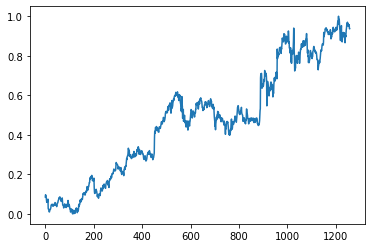

In [9]:
plt.plot(train_scaled)
plt.show()

In [14]:
# creating a data structure with 50 timesteps and 1 output
x_train = [] 
y_train = []
# ilk 50 adedi sample al (train) sonraki 51. adedi test için kullan , geri kalanlar için aynı şekilde devam ettir.
timesteps = 50
for i in range (timesteps , 1258):
  x_train.append(train_scaled[i-timesteps:i , 0])
  y_train.append(train_scaled[i,0])
x_train , y_train = np.array(x_train) , np.array(y_train)


**SHIFTING**

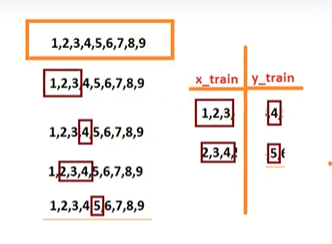

In [13]:
# reshaping
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1] , 1))
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

**CREATE RNN MODEL**

In [25]:
# importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense # layers
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# Adding the first RNN and some Dropout regularisation
regressor.add(SimpleRNN(units = 50 , activation="relu" , return_sequences = True , input_shape = (x_train.shape[1] ,1)))
regressor.add(Dropout(0.2))

# Adding a second RNN and some Dropout regularisation
regressor.add(SimpleRNN(units = 50 , activation="relu" , return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN and some Dropout regularisation
regressor.add(SimpleRNN(units = 50 , activation="relu" , return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN and some Dropout regularisation
regressor.add(SimpleRNN(units = 50 ))
regressor.add(Dropout(0.2))

# adding yhe output layer 
regressor.add(Dense(units=1))

# compiling the RNN
regressor.compile(optimizer = "adam" , loss="mean_squared_error")

# fitting the RNN to the Training set
regressor.fit(x_train , y_train , epochs = 100 , batch_size= 32)

Epoch 1/100
38/38 [==============================] - 5s 47ms/step - loss: 0.0779
Epoch 2/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0176
Epoch 3/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0130
Epoch 4/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0115
Epoch 5/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0095
Epoch 6/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0085
Epoch 7/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0081
Epoch 8/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0071
Epoch 9/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0069
Epoch 10/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0061
Epoch 11/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0059
Epoch 12/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0057
Epoch 13/100
38/38 [=====

**Predicting and Visualizating RNN Model**

In [26]:
# getting the real stock price of 2017
dataset_test = pd.read_csv('Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [27]:
real_stock_price = dataset_test.loc[: , ["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [28]:
# Getting then predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) # min max scaler
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

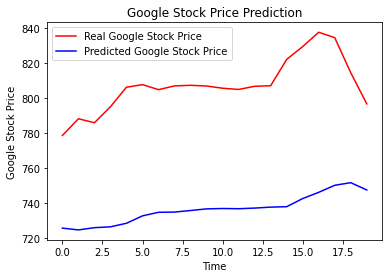

In [32]:
x_test = []
for i in range(timesteps, 70):
    x_test.append(inputs[i-timesteps:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
# epoch = 250 daha güzel sonuç veriyor.

<a id="4"></a>
## Long Short Term Memory (LSTMs)
* LSTM is variant of RNN.
* LSTM de RNN'den farklı olarak long term memory var. 
* LSTM architecture:
    * x: scaling of information
    * +: Adding information
    * sigmoid layer. Sigmoid memory den bir şeyi hatırlamak için yada unutmak için kullanılır. 1 yada 0'dır.
    * tanh: activation function tanh. Tanh vanishing gradient(yavaş öğrenme - çok küçük gradient) problemini çözer. Çünkü parametreleri update ederken türev alıyorduk. Tanh'ın türevi hemen sıfır'a ulaşmaz.
    * h(t-1): output of LSTM unit
    * c(t-1): memory from previous LSTM unit
    * X(t): input
    * c(t): new updated memory
    * h(t): output
    * From c(t-1) to c(t) is memory pipeline. or only memory.
    * Oklar vektör.
    * h(t-1) ile X(t) birleşmiyor parallel iki yol olarak düşünebilirsiniz.
* ![Time](lstm.jpg)
* 1) Forget gate: input olarak X(t) ve h(t-1) alır. Gelen bilginin unutulup unutulmayacağına karar verir.
* 2) Input gate: Hangi bilginin memory de depolanıp depolanmayacağına karar verir.
* 3) Output gate: Hangi bilginin output olup olmayacağına karar verir.
* Örneğin: 
    * ... "Boys are watching TV"
    * "On the other hand girls are playing baseball."
    * Forget "boys". new input is "girls" and output is "girls"

<a id="99"></a>
## Implementing Long Short Term Memory with Keras
* [Loading and Visualizing Data](#41)
* [Preprocessing Data](#42)
* [Create LSTM Model](#43)
* [Predictions and Visualising LSTM Model](#44)

<a id="41"></a>
### Loading and Visualizing Data

In [33]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [34]:
data = pd.read_csv('international-airline-passengers.csv',skipfooter=5)
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


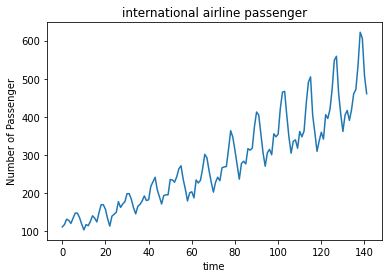

In [35]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

<a id="42"></a>
### Preprocessing Data
* reshape
* change type
* scaling
* train test split
* Create dataset

In [36]:
dataset = dataset.reshape(-1,1) # (142,) -> (142,1) oldu. Aslında ikiside aynı şeyi tanımlamaktadır. Bazı metodlarda hata verdiği için reshape işlemi yapıldı.
dataset = dataset.astype("float32") # tüm değerler float'a dönüştürüldü
dataset.shape


(142, 1)

In [37]:
# scaling  - hızlandırma
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [38]:
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 71, test size: 71 


In [39]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = numpy.array(dataX)
trainY = numpy.array(dataY)  


In [40]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = numpy.array(dataX)
testY = numpy.array(dataY)  

In [41]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

**Create LSTM Model**

In [42]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
60/60 [==============================] - 2s 2ms/step - loss: 0.0203
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 4/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 5/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 6/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 7/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 8/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 9/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 10/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 11/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 12/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 13/50
60/60 [==============================

<a id="44"></a>
### Predictions and Visualising LSTM Model

In [43]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict) # inverse_transform : veriler tekrar eski boyutlarına döndürüldü
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 16.44 RMSE
Test Score: 37.67 RMSE


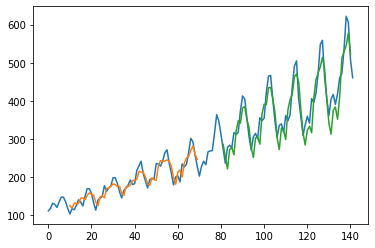

In [44]:
# shifting train
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

blue : data

orange : train edilen data

green : future prediction